## Humanities Digital Archives Project, Part 3 Data Visualization
Shruti Gupta, Lisa Over, L. Sooter<BR><BR>

#### Before running this program, create Topic_Name and Topic_Short_Name columns in items_topics_summ.csv file and name the topics. Topic_Short_Name is used as the title of the time series plots.

In [38]:
import warnings;
warnings.filterwarnings('ignore');

In [39]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime
from dateutil import parser
import chart_studio
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import re

### Visualize the 26 Topics from the Final Model

In [40]:
# Load items with topic labels
pd.set_option('display.max_columns', None)
lib_data = pd.read_csv('items_dominant_topics.csv', encoding='latin-1')

# Display the head
lib_data.head()

,Unnamed: 0,index,Identifier,Title,Creator,Sort Date,Type of Resource,Genre,Abstract,Source,Site Membership,Collection Membership,Ttle_Abs,Abstract_cspell,Abstract_noc,Abstract_clean,Abstract_lemma,Dominant_Topic,Perc_Contribution,Topic_Keywords,Dominant_Topic_Vis
0,0,0,000001.PIC,Musicians,Paul Slantis,1950-01-01T00:00:00,still image,photograph,Six young African-American males playing percu...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,Musicians. Six young African-American males pl...,musicians. six young african-american males pl...,musicians. six young african-american males pl...,musicians six young african american males pla...,musician six young african american male play ...,7.0,0.0946,"play, theatre, present, thomas, display, class...",9
1,1,1,000001.UE,Sylvania Locals Conference,United Electrical Workers,1945-04-29T00:00:00,still image,photograph,Leaders of Sylvania Locals. Front row (L-R): L...,"UE News Photograph Collection, 1933-1998UE New...","HistPitt, Digital",collection.89,Sylvania Locals Conference. Leaders of Sylvani...,sylvania locals conference. leaders of sylvani...,sylvania locals conference. leaders of sylvani...,sylvania locals conference leaders sylvania lo...,sylvania local conference leader sylvania loca...,10.0,0.1871,"worker, union, labor, caption, executive, stri...",4
2,2,2,000002.PIC,USMC Pilot with McDonnell FH Phantom,Paul Slantis,1950-01-01T00:00:00,still image,photograph,United States Marine Corps pilot with his McDo...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,USMC Pilot with McDonnell FH Phantom. United S...,usmc pilot with mcdonnell fh phantom. united s...,usmc pilot with mcdonnell fh phantom. united s...,usmc pilot mcdonnell fh phantom united states ...,usmc pilot mcdonnell fh phantom united state m...,18.0,0.1192,"room, church, march, john, art, great, jame, w...",10
3,3,3,000002.UE,Soup Kitchen,United Electrical Workers,1940-01-01T00:00:00,still image,photograph,Drinking donated coffee at Johnsonburg Plant S...,"UE News Photograph Collection, 1933-1998UE New...","HistPitt, Digital",collection.89,Soup Kitchen. Drinking donated coffee at Johns...,soup kitchen. drinking donated coffee at johns...,soup kitchen. drinking donated coffee at johns...,soup kitchen drinking donated coffee johnsonbu...,soup kitchen drink donate coffee johnsonburg p...,17.0,0.1320,"mine, coal, violin, bulletin_index, row, healt...",17
4,4,4,000003.PIC,Greater Pittsburgh International Airport Opening,Paul Slantis,1952-05-31T00:00:00,still image,photograph,US Navy airplanes lined up on the tarmac of th...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,Greater Pittsburgh International Airport Openi...,greater pittsburgh international airport openi...,greater pittsburgh international airport openi...,greater pittsburgh international airport openi...,great pittsburgh international airport open un...,9.0,0.0788,"building, pittsburgh, construction, build, cen...",2


In [41]:
# Load topic list with names
pd.set_option('display.max_columns', None)
topics = pd.read_csv('items_topics_summ.csv', encoding='latin-1')

# Display the head
topics.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326


In [42]:
topics['Topic_Num_Vis_D'] = 'Topic_Num_Vis: '
topics.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:


In [43]:
topics['Display_Name'] = topics['Topic_Num_Vis_D'] + topics['Topic_Num_Vis'].astype(str)
topics.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D,Display_Name
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:,Topic_Num_Vis: 1
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:,Topic_Num_Vis: 2
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:,Topic_Num_Vis: 3
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:,Topic_Num_Vis: 4
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:,Topic_Num_Vis: 5


In [44]:
lib_data['Abstract_exists'] = pd.notnull(lib_data['Abstract'])

In [45]:
# Get a bool series representing True for row in which 'Abstract' exists, False otherwise
# Count number of True for each topic
topic = []
numAbs = []
for i in range(len(topics)):
    #print(i)
    topic.append(i)
    numAbs.append(len(lib_data[(lib_data['Abstract_exists'] == True) & (lib_data['Dominant_Topic'] == i)].index))
    #print(len(lib_data[(lib_data14['Abstract_exists'] == True) & (lib_data14['Dominant_Topic'] == i)].index))


In [46]:
num_Abstracts = pd.DataFrame({'Dominant_Topic': topic, 'Num_Abstract': numAbs})
num_Abstracts.head()

,Dominant_Topic,Num_Abstract
0,0,1253
1,1,1190
2,2,3358
3,3,3034
4,4,2728


In [47]:
items_topics_summ = pd.merge(topics,
    num_Abstracts[['Num_Abstract', 'Dominant_Topic']],
    left_on='Topic_Num',
    right_on='Dominant_Topic',
    how='left')
items_topics_summ.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D,Display_Name,Num_Abstract,Dominant_Topic
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:,Topic_Num_Vis: 1,3358,2
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:,Topic_Num_Vis: 2,2489,9
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:,Topic_Num_Vis: 3,3539,6
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:,Topic_Num_Vis: 4,2632,10
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:,Topic_Num_Vis: 5,1901,8


In [48]:
items_topics_summ['Topic_Num_Vis_D'] = 'Topic_Num_Vis: '
items_topics_summ.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D,Display_Name,Num_Abstract,Dominant_Topic
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:,Topic_Num_Vis: 1,3358,2
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:,Topic_Num_Vis: 2,2489,9
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:,Topic_Num_Vis: 3,3539,6
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:,Topic_Num_Vis: 4,2632,10
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:,Topic_Num_Vis: 5,1901,8


In [49]:
items_topics_summ['Display_Name'] = items_topics_summ['Topic_Num_Vis_D'] + items_topics_summ['Topic_Num_Vis'].astype(str)
items_topics_summ.head()

,Topic_Num,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D,Display_Name,Num_Abstract,Dominant_Topic
0,2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:,Topic_Num_Vis: 1,3358,2
1,9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:,Topic_Num_Vis: 2,2489,9
2,6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:,Topic_Num_Vis: 3,3539,6
3,10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:,Topic_Num_Vis: 4,2632,10
4,8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:,Topic_Num_Vis: 5,1901,8


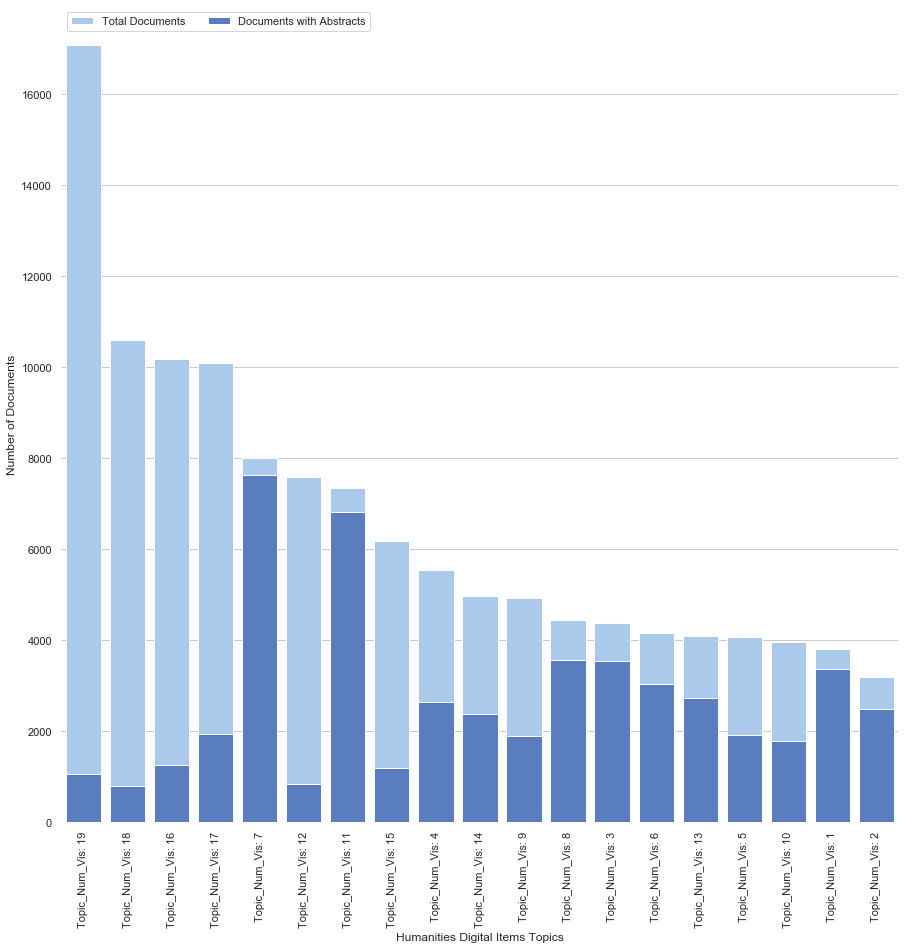

In [50]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Load and sort data
sorted_topics = items_topics_summ.sort_values("Num_Documents", ascending=False)

# Plot the total documents
sns.set_color_codes("pastel")
sns.barplot(x="Display_Name", y="Num_Documents", data=sorted_topics,
            label="Total Documents", color="b")

# Plot the items that had abstracts
sns.set_color_codes("muted")
sns.barplot(x="Display_Name", y="Num_Abstract", data=sorted_topics,
            label="Documents with Abstracts", color="b")

for item in ax.get_xticklabels():
    item.set_rotation(90)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Number of Documents",
       xlabel="Humanities Digital Items Topics")
sns.despine(left=True, bottom=True)

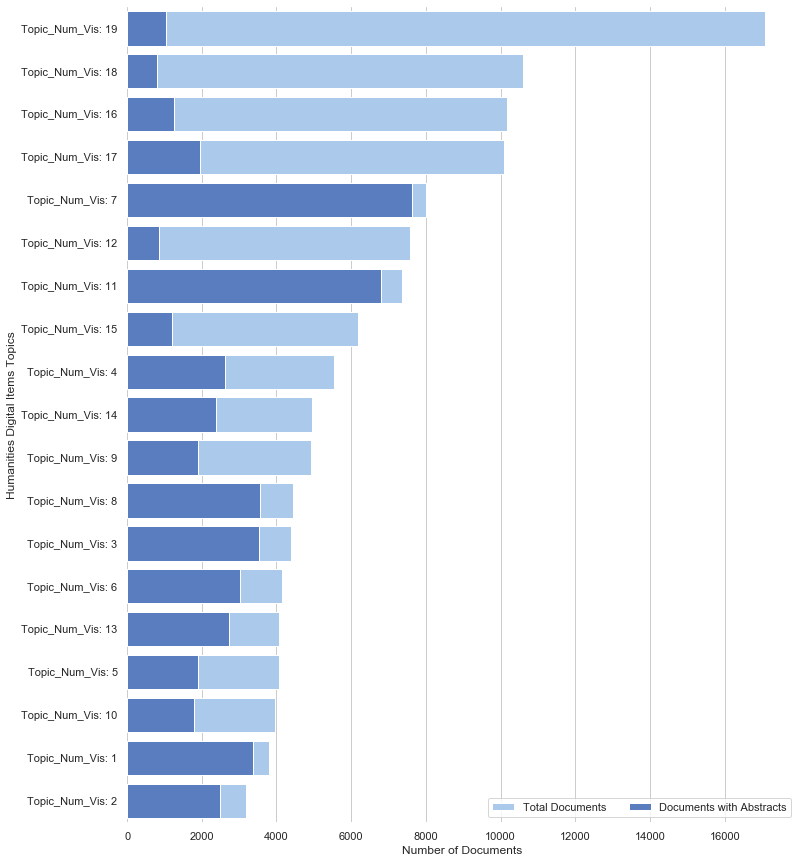

In [51]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 15)) # tweak these numbers to get graph to print without truncating image

# Load and sort data
sorted_topics = items_topics_summ.sort_values("Num_Documents", ascending=False)

# Plot the total documents
sns.set_color_codes("pastel")
sns.barplot(x="Num_Documents", y="Display_Name", data=sorted_topics,
            label="Total Documents", color="b", orient = 'h')

# Plot the items that had abstracts
sns.set_color_codes("muted")
sns.barplot(x="Num_Abstract", y="Display_Name", data=sorted_topics,
            label="Documents with Abstracts", color="b", orient = 'h')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Humanities Digital Items Topics",
       xlabel="Number of Documents")
sns.despine(left=True, bottom=True)

plt.savefig('presentation/topics.png')

In [52]:
lib_data.head()

,Unnamed: 0,index,Identifier,Title,Creator,Sort Date,Type of Resource,Genre,Abstract,Source,Site Membership,Collection Membership,Ttle_Abs,Abstract_cspell,Abstract_noc,Abstract_clean,Abstract_lemma,Dominant_Topic,Perc_Contribution,Topic_Keywords,Dominant_Topic_Vis,Abstract_exists
0,0,0,000001.PIC,Musicians,Paul Slantis,1950-01-01T00:00:00,still image,photograph,Six young African-American males playing percu...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,Musicians. Six young African-American males pl...,musicians. six young african-american males pl...,musicians. six young african-american males pl...,musicians six young african american males pla...,musician six young african american male play ...,7.0,0.0946,"play, theatre, present, thomas, display, class...",9,True
1,1,1,000001.UE,Sylvania Locals Conference,United Electrical Workers,1945-04-29T00:00:00,still image,photograph,Leaders of Sylvania Locals. Front row (L-R): L...,"UE News Photograph Collection, 1933-1998UE New...","HistPitt, Digital",collection.89,Sylvania Locals Conference. Leaders of Sylvani...,sylvania locals conference. leaders of sylvani...,sylvania locals conference. leaders of sylvani...,sylvania locals conference leaders sylvania lo...,sylvania local conference leader sylvania loca...,10.0,0.1871,"worker, union, labor, caption, executive, stri...",4,True
2,2,2,000002.PIC,USMC Pilot with McDonnell FH Phantom,Paul Slantis,1950-01-01T00:00:00,still image,photograph,United States Marine Corps pilot with his McDo...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,USMC Pilot with McDonnell FH Phantom. United S...,usmc pilot with mcdonnell fh phantom. united s...,usmc pilot with mcdonnell fh phantom. united s...,usmc pilot mcdonnell fh phantom united states ...,usmc pilot mcdonnell fh phantom united state m...,18.0,0.1192,"room, church, march, john, art, great, jame, w...",10,True
3,3,3,000002.UE,Soup Kitchen,United Electrical Workers,1940-01-01T00:00:00,still image,photograph,Drinking donated coffee at Johnsonburg Plant S...,"UE News Photograph Collection, 1933-1998UE New...","HistPitt, Digital",collection.89,Soup Kitchen. Drinking donated coffee at Johns...,soup kitchen. drinking donated coffee at johns...,soup kitchen. drinking donated coffee at johns...,soup kitchen drinking donated coffee johnsonbu...,soup kitchen drink donate coffee johnsonburg p...,17.0,0.1320,"mine, coal, violin, bulletin_index, row, healt...",17,True
4,4,4,000003.PIC,Greater Pittsburgh International Airport Opening,Paul Slantis,1952-05-31T00:00:00,still image,photograph,US Navy airplanes lined up on the tarmac of th...,"Paul Slantis Photograph Collection, ca. 1946-1...","HistPitt, Digital",collection.68,Greater Pittsburgh International Airport Openi...,greater pittsburgh international airport openi...,greater pittsburgh international airport openi...,greater pittsburgh international airport openi...,great pittsburgh international airport open un...,9.0,0.0788,"building, pittsburgh, construction, build, cen...",2,True


In [53]:
lib_data['Sort Date'].dtypes

dtype('O')

In [54]:
# Replace NaN with empty string
lib_data = lib_data.replace(np.nan, '', regex=True)

In [55]:
def get_date(t):
    t = t.replace('T', ' ')
    # Some dates were %Y-00-00 which did not convert to date
    t = t.replace('00-00', '01-01')
    try:
        dt = parser.parse(t).date()
    except:
        dt = ''
    finally:
        return dt

In [56]:
# Call get_date
lib_data['Date'] = lib_data.apply(lambda txt: get_date(txt['Sort Date']), axis=1)

In [57]:
lib_data['Date'].head()

0    1950-01-01
1    1945-04-29
2    1950-01-01
3    1940-01-01
4    1952-05-31
Name: Date, dtype: object

In [58]:
def get_year(t):
    dt = t.split('-')
    return dt[0]

In [59]:
# Call get_year
lib_data['Year'] = lib_data.apply(lambda txt: get_year(txt['Sort Date']), axis=1)

In [60]:
lib_data['Year'].head()

0    1950
1    1945
2    1950
3    1940
4    1952
Name: Year, dtype: object

In [61]:
lib_ts = lib_data[lib_data['Year'] != '']
#topic_year_cnt = topic_year_cnt.replace(r'^\s*$', np.NaN, regex=True)

In [62]:
topic_year_cnt = lib_ts.groupby(['Dominant_Topic','Date']).size().reset_index()

In [63]:
topic_year_cnt.columns.to_list()

['Dominant_Topic', 'Date', 0]

In [64]:
topic_year_cnt.rename(columns = {0:'Count'}, inplace = True) 

In [65]:
topic_year_cnt.head()

,Dominant_Topic,Date,Count
0,0.0,1700-01-01,17
1,0.0,1754-01-01,1
2,0.0,1756-01-01,1
3,0.0,1760-10-30,1
4,0.0,1772-01-19,1


In [66]:
topic_year_cnt.sort_values("Date", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [67]:
topic_year_cnt.to_csv(r'presentation/topic_year_cnt.csv')

In [68]:
fig = go.Figure(go.Scatter(x=topic_year_cnt['Date'], y=topic_year_cnt['Count']))
fig.update_layout(title_text='All Archival Item Counts by Date')
pio.write_html(fig, file='presentation/all_archival_counts_bydate_1.html', auto_open=True)

In [69]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=list(topic_year_cnt.Date), y=list(topic_year_cnt.Count)))
# Set title
fig.update_layout(
    title_text="All Archival Items Counts by Date"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

pio.write_html(fig, file='presentation/all_archival_counts_bydate.html', auto_open=True)

fig.show()

In [70]:
titles = topics.copy()
titles.set_index('Topic_Num')

,Topic_Num_Vis,Topic_Name,Topic_Short_Name,Topic_Keywords,Num_Documents,Prop_Documents,Topic_Num_Vis_D,Display_Name
Topic_Num,,,,,,,,
2,1,"Religious Structures, Practices, History (Chri...",Religion; Gothic Architecture; Windows and Por...,"window, gothic, delaporte, figure, porch, hand...",3810,0.0306,Topic_Num_Vis:,Topic_Num_Vis: 1
9,2,"Buildings: History, Construction, Restoration,...","Buildings: History, Construction, Restoration,...","building, pittsburgh, construction, build, cen...",3192,0.0256,Topic_Num_Vis:,Topic_Num_Vis: 2
6,3,Primary and Secondary Industry: People Working...,Primary and Secondary Industry: People Working...,"company, steel, mill, work, plant, department,...",4381,0.0352,Topic_Num_Vis:,Topic_Num_Vis: 3
10,4,Unions and Labor; Political and Economic Ideal...,Unions and Labor; Political and Economic Ideal...,"worker, union, labor, caption, executive, stri...",5531,0.0444,Topic_Num_Vis:,Topic_Num_Vis: 4
8,5,"Neighborhood Institutions, Facilities, and Pub...","Neighborhood Institutions, Facilities, and Pub...","school, high, oakmont, student, public, pittsb...",4062,0.0326,Topic_Num_Vis:,Topic_Num_Vis: 5
3,6,"Allegheny County History, Geography, and Gover...",Allegheny County; Allegheny Mountains; Alleghe...,"allegheny, road, park, county, north, pa, west...",4148,0.0333,Topic_Num_Vis:,Topic_Num_Vis: 6
15,7,City Roadways and Neighborhoods; Locations of ...,City Roadways and Neighborhoods; Locations of ...,"street, avenue, west, east, grant, district, l...",8005,0.0643,Topic_Num_Vis:,Topic_Num_Vis: 7
14,8,"Portraits; People: Living, Working, Learning, ...","Portraits; People: Living, Working, Learning, ...","man, woman, front, child, group, portrait, sig...",4445,0.0357,Topic_Num_Vis:,Topic_Num_Vis: 8
7,9,Maps of Pittsburgh; Performing Arts; Gathering...,Maps of Pittsburgh; Performing Arts; Gathering...,"play, theatre, present, thomas, display, class...",4921,0.0395,Topic_Num_Vis:,Topic_Num_Vis: 9


In [71]:
titles.ix[1,['Topic_Name']].values[0]

'Buildings: History, Construction, Restoration, and Renovation'

In [72]:
data = topic_year_cnt[topic_year_cnt['Dominant_Topic'] == 6]
data.head()

,Dominant_Topic,Date,Count
12590,6.0,1027-01-01,25
12591,6.0,1700-01-01,12
12592,6.0,1745-01-01,1
12593,6.0,1749-01-01,1
12594,6.0,1750-01-01,4


In [73]:
# https://plotly.com/python/range-slider/
def plot_by_topic(data, topic, title, display):
    display = re.sub(r'[^\w\s]','',display)
    filename = 'presentation/' + display + '.html'
    
    data = data[data['Dominant_Topic'] == topic]
    
    fig = go.Figure()
    fig.add_trace(
    go.Scatter(x=list(data.Date), y=list(data.Count)))
    # Set title
    fig.update_layout(
    title_text=display + ':  ' + title
    )

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

    pio.write_html(fig, file=filename, auto_open=True)

In [74]:
# Call plot_by_topic for each topic
for i in range(len(topics)):
    plot_by_topic(topic_year_cnt, i, titles.ix[i,['Topic_Short_Name']].values[0], titles.ix[i,['Display_Name']].values[0])